In [18]:
import Ab as ab
import datetime as dt
import pandas as pd
sd = dt.datetime(2021,12,14)
ed = dt.datetime(2023,4,6)
# 1x leveraged nasdaq 100 etf
qqq = ab.StockData('QQQ')
qqq.get_data_from_yfinance('QQQ',sd,ed+dt.timedelta(days=1))

qld = ab.StockData('QLD')
qld.get_data_from_yfinance('QLD',sd,ed+dt.timedelta(days=1))

tqqq = ab.StockData('TQQQ')
tqqq.get_data_from_yfinance('TQQQ',sd,ed+dt.timedelta(days=1))

spy = ab.StockData('SPY')
spy.get_data_from_yfinance('SPY',sd,ed+dt.timedelta(days=1))

ticker = tqqq

naa200r = ab.StockData('NAA200R')
naa200r.get_data_from_csv('data/NAA200R.csv')

ndxa200r = ab.StockData('NDXA200R')
ndxa200r.get_data_from_csv('data/NDXA200R.csv')


spxa200r = ab.StockData('SPXA200R')
spxa200r.get_data_from_csv('data/SPXA200R.csv')
indicator = naa200r



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

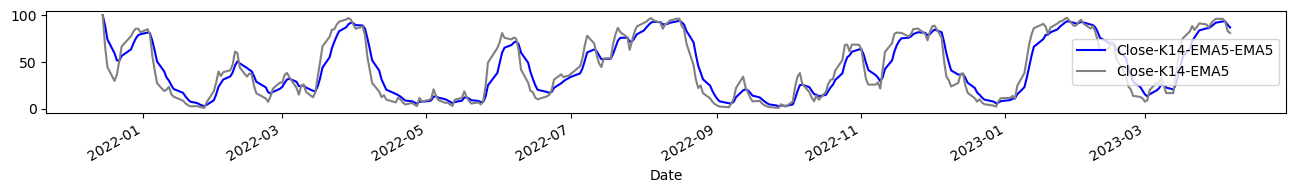

In [42]:
#Fast Stochastic Oscillator:
#Fast %K = %K basic calculation
#Fast %D = 5-period SMA of Fast %K
tqqq.get_k('Close', 14)
tqqq.get_ema('Close-K14', [5])

#Slow Stochastic Oscillator:
#Slow %K = 5-period EMA of Fast %K
#Slow %D = 5-period EMA of Slow %K
tqqq.get_ema('Close-K14', [5])
tqqq.get_ema('Close-K14-EMA5', [5])

#plotting the slow stochastic oscillator with blue and green lines
tqqq.data.plot(y=['Close-K14-EMA5-EMA5', 'Close-K14-EMA5'], figsize=(16,1.5), sharey=True, color=['blue', 'grey'])




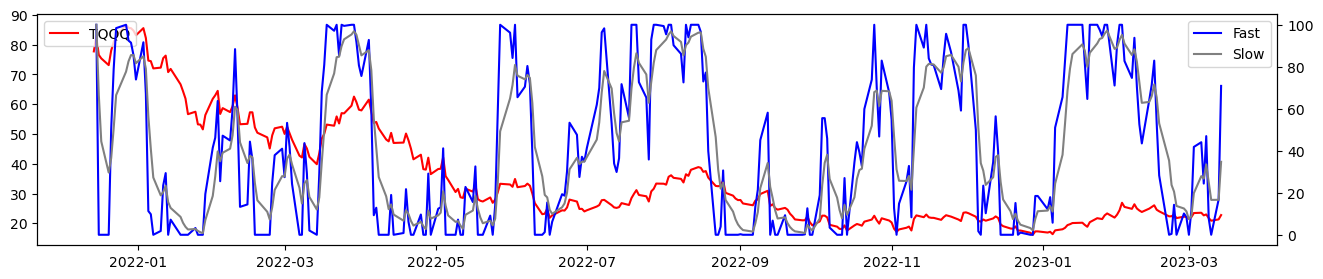

In [9]:
import matplotlib.pyplot as plt
#plotting the tqqq 'Close' as Y on the left axis and the 'K14' as Y on the right axis
#set figure size 16x9
fig = plt.figure(figsize=(16,3))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ax1.plot(tqqq.data.index, tqqq.data['Close'], color='red', label=tqqq.ticker)
ax2.plot(tqqq.data.index, tqqq.data['Close-K14'], color='blue', label='Fast')
ax2.plot(tqqq.data.index, tqqq.data['Close-K14-EMA5'], color='grey', label='Slow')
ax1.legend(loc=2)
ax2.legend(loc=1)
plt.show()




In [ ]:
test_start = dt.datetime(2010,4,21)
test_end = dt.datetime(2017,4,21)


In [ ]:
#buy and hold
import time
bah = ab.BuyAndHold(ticker)
#time the execution of the strategy
start_time = time.time()
bah.run_strategy(ticker,test_start,test_end)
print("--- %s seconds ---" % (time.time() - start_time))
bah.trades

In [ ]:

bah_bt = ab.BackTest()
start_time = time.time()
bah_bt.run_backtest(bah,ticker,test_start,test_end)
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:

bah_bt.plot_balance()
bah_bt.plot_records()
bah_bt.performance_summary()

In [ ]:
bah_bt.trade_records

In [ ]:
stg = ab.Threshold('NAA200R')
stg.run_strategy(naa200r, start_date=test_start, end_date=test_end)

#stg = ab.MAThreshold('NAA200R',21, 1,1)
#stg.run_strategy(naa200r, test_start, test_end)

#stg = ab.MACross('MaCross',50,200)
#stg.run_strategy(naa200r, test_start, test_end)


In [ ]:
stg.trades.loc[stg.trades['Signal'] !=0]

In [ ]:
naa200r_bt_weekly = ab.BackTest()
naa200r_bt_weekly.run_backtest(stg, ticker,test_start,test_end, True,True)


In [ ]:
import matplotlib.pyplot as plt
naa200r_bt_weekly.plot_balance()
naa200r_bt_weekly.performance_summary()

plt.savefig('data/{}_naa200r_bt_weekly_{}-{}.png'.format(ticker.ticker,ticker.start_date.date(),ticker.end_date.date()))
naa200r_bt_weekly.trade_records.to_csv('data/{}_naa200r_bt_weekly_{}-{}.csv'.format(ticker.ticker,ticker.start_date.date(),ticker.end_date.date()))

In [ ]:
naa200r_bt_weekly.plot_records()
naa200r_bt_weekly.trade_records

In [ ]:
naa200r_bt_daily = ab.BackTest()
naa200r_bt_daily.run_backtest(stg, ticker, test_start,test_end)

In [ ]:
#set print limit for dataframe
pd.set_option('display.max_rows', 10000)
print(naa200r_bt_daily.balance)

In [ ]:
import matplotlib.pyplot as plt
plt.savefig('data/{}_naa200r_bt_daily_{}-{}.png'.format(ticker.ticker,ticker.start_date.date(),ticker.end_date.date()))
naa200r_bt_daily.trade_records.to_csv('data/{}_naa200r_15-30-MA20-daily_{}-{}.csv'.format(ticker.ticker,ticker.start_date.date(),ticker.end_date.date()))
naa200r_bt_daily.performance_summary()
naa200r_bt_daily.plot_balance()

In [ ]:
naa200r_bt_daily.plot_records()